# NBA 2k player rating prediction

## Library

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data load

In [42]:
df_path_interim = "../data/interim/"
df_path_raw = "../data/raw/"
df_player_rating_stats = pd.read_csv(df_path_interim + "df_player_rating_stats.csv")
df_player = pd.read_csv(df_path_raw + "df_nba_players.csv")
df_player_info = pd.read_csv(df_path_raw + "df_players_info.csv")

In [43]:
df_player = pd.merge(df_player, df_player_info.loc[:, ['PERSON_ID', 'POSITION']], how = "left",
                     left_on = "id", right_on = "PERSON_ID").loc[:, ['full_name', 'POSITION']]

In [44]:
df_player_rating_stats = pd.merge(df_player_rating_stats, df_player, how = 'left')

In [45]:
df_player_rating_stats.columns

Index(['full_name', 'season_id', 'player_age', 'player_id', 'league_id',
       'team_id', 'gp', 'gs', 'min', 'fgm', 'fga', 'fg_pct', 'fg3m', 'fg3a',
       'fg3_pct', 'ftm', 'fta', 'ft_pct', 'oreb', 'dreb', 'reb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts', 'id', 'rating', 'ptspg', 'rebpg', 'orebpg',
       'drebpg', 'astpg', 'stlpg', 'blkpg', 'tovpg', 'pfpg', 'POSITION'],
      dtype='object')

## Analysis

In [46]:
# looking for null values
pd.DataFrame({"dtypes": df_player_rating_stats.dtypes,
              "null values": df_player_rating_stats.isnull().sum()})

,dtypes,null values
full_name,object,0
season_id,object,0
player_age,float64,0
player_id,int64,0
league_id,int64,0
team_id,int64,0
gp,int64,0
gs,int64,0
min,float64,0
fgm,int64,0


There are null values on percentage of field goals and free throws

In [47]:
df_player_rating_stats[df_player_rating_stats['fg_pct'].isnull()]['fga'].sum()

0

In [48]:
df_player_rating_stats[df_player_rating_stats['fg3_pct'].isnull()]['fg3a'].sum()

0

In [49]:
df_player_rating_stats[df_player_rating_stats['ft_pct'].isnull()]['fta'].sum()

0

Appearently, these players didn't attempt shooting, so when creating the percentage variable, we are dividing by zero, that doesn't make any sense, so we get null values from there.

The rating variable it's because probably we don't have the player rating on our source data.

Group some columns to see common staistics values.

In [67]:
others = ['player_age', 'gp', 'gs', 'min', 'rating']
shooting = ['fgm', 'fga', 'fg_pct', 'fg3m', 'fg3a', 'fg3_pct', 'ftm', 'fta', 'ft_pct']
stats = ['pts', 'reb', 'oreb', 'dreb', 'ast', 'stl', 'blk', 'tov', 'pf']
statspg = ['ptspg', 'rebpg', 'orebpg', 'drebpg', 'astpg', 'stlpg', 'blkpg', 'tovpg', 'pfpg']

In [68]:
df_player_rating_stats.loc[:, others].describe()

,player_age,gp,gs,min,rating
count,2872.000000,2872.000000,2872.000000,2872.000000,2278.000000
mean,25.179666,51.751045,30.127437,1329.075905,76.739684
std,3.712560,23.611648,28.852508,848.869392,6.808460
min,19.000000,1.000000,0.000000,1.000000,49.000000
25%,22.000000,33.000000,2.000000,590.750000,72.000000
50%,25.000000,58.000000,21.000000,1298.500000,76.000000
75%,27.000000,72.000000,58.000000,2024.250000,80.000000
max,41.000000,82.000000,82.000000,3388.000000,99.000000


In [69]:
df_player_rating_stats.loc[:, shooting].describe()

,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct
count,2872.000000,2872.000000,2858.000000,2872.000000,2872.000000,2727.000000,2872.000000,2872.000000,2791.000000
mean,229.868733,495.672006,0.455852,55.498607,154.474930,0.316488,107.350975,139.877089,0.751538
std,180.946767,382.640320,0.092441,57.320234,149.646478,0.126874,114.667606,144.934838,0.122257
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80.000000,178.000000,0.413927,6.000000,23.000000,0.285714,27.000000,37.000000,0.693274
50%,196.500000,430.000000,0.448591,40.000000,118.000000,0.340426,71.000000,94.000000,0.770833
75%,338.000000,729.000000,0.495033,87.000000,246.000000,0.380058,147.000000,194.000000,0.831631
max,875.000000,1941.000000,1.000000,402.000000,1028.000000,1.000000,756.000000,916.000000,1.000000


In [70]:
df_player_rating_stats.loc[:, stats].describe()

,pts,reb,oreb,dreb,ast,stl,blk,tov,pf
count,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000
mean,622.587047,245.717618,58.290390,187.427228,135.601671,44.577646,27.871518,78.799095,106.304666
std,501.288836,203.515988,61.688326,150.372106,143.891250,35.642057,32.864930,66.681903,66.870557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,216.750000,94.000000,17.000000,73.000000,36.000000,16.000000,7.000000,27.000000,51.000000
50%,525.000000,204.500000,38.000000,160.000000,90.000000,38.000000,17.000000,63.500000,104.000000
75%,917.000000,345.000000,76.000000,263.000000,185.000000,64.000000,37.000000,114.000000,156.000000
max,2818.000000,1247.000000,440.000000,882.000000,925.000000,217.000000,269.000000,464.000000,292.000000


In [71]:
df_player_rating_stats.loc[:, statspg].describe()

,ptspg,rebpg,orebpg,drebpg,astpg,stlpg,blkpg,tovpg,pfpg
count,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000
mean,10.699563,4.288728,1.017304,3.271424,2.336385,0.775345,0.487464,1.362369,1.895386
std,6.617193,2.639204,0.854483,1.953895,2.070820,0.462799,0.476811,0.897920,0.757796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.666667,2.420789,0.426557,1.889849,0.928571,0.444444,0.173269,0.714286,1.409965
50%,9.398113,3.800000,0.751712,2.947332,1.666667,0.712329,0.347826,1.153846,1.921311
75%,14.646175,5.507777,1.340685,4.231004,3.104674,1.028675,0.633654,1.814815,2.427143
max,36.128205,15.987179,5.432099,11.540541,11.738462,2.769231,3.684932,5.728395,4.875000


In [56]:
df_statspg_melt = pd.melt(df_player_rating_stats.loc[:, ['ptspg', 
                                                         'rebpg',
                                                         'astpg',
                                                         'stlpg',
                                                         'blkpg',
                                                         'tovpg',
                                                         'pfpg']])


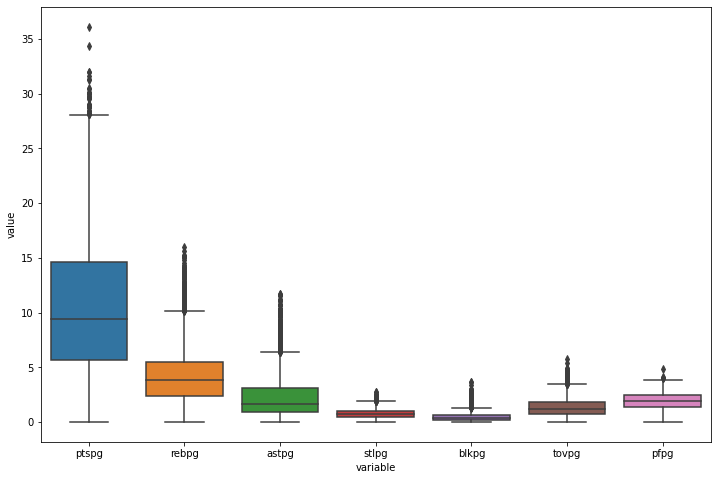

In [63]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'variable', y = 'value', data = df_statspg_melt)
plt.show()

In [58]:
df_statspct_melt = pd.melt(df_player_rating_stats.loc[:, ['fg_pct', 'fg3_pct', 'ft_pct']])

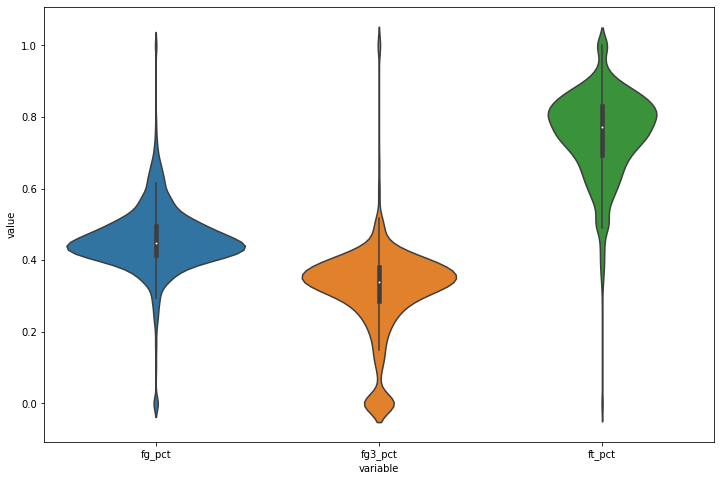

In [62]:
plt.figure(figsize = (12, 8))
sns.violinplot(x = 'variable', y = 'value', data = df_statspct_melt)
plt.show()

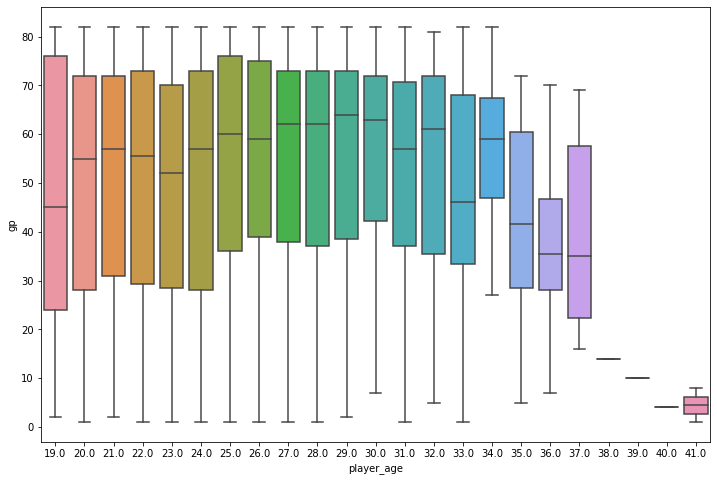

In [10]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = "player_age", y = 'gp', data = df_player_rating_stats)
plt.show()

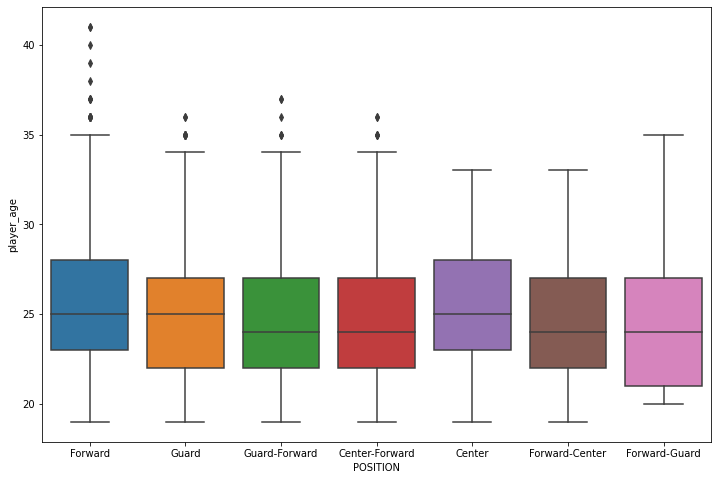

In [7]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = "POSITION", y = 'player_age', data = df_player_rating_stats)
plt.show()

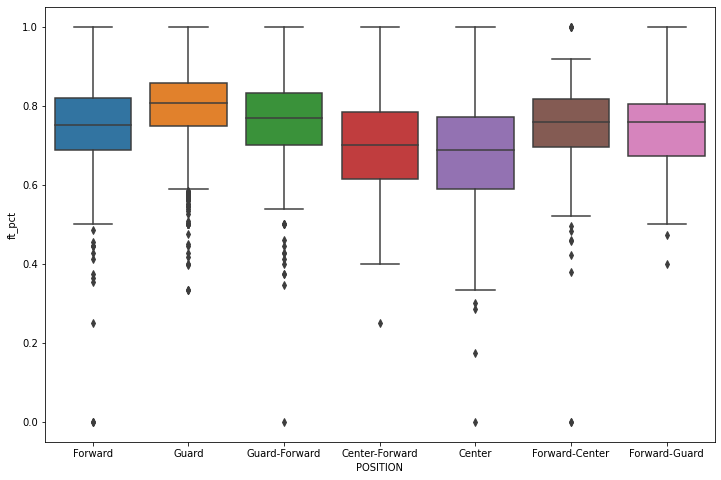

In [12]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = "POSITION", y = 'ft_pct', data = df_player_rating_stats)
plt.show()

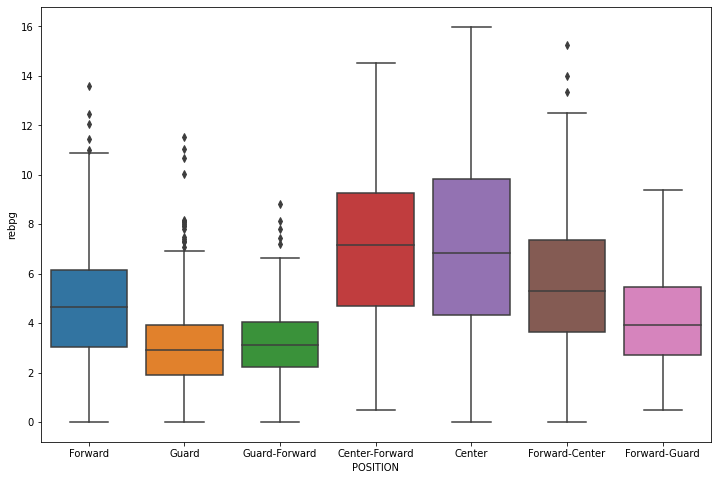

In [16]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = "POSITION", y = 'rebpg', data = df_player_rating_stats)
plt.show()

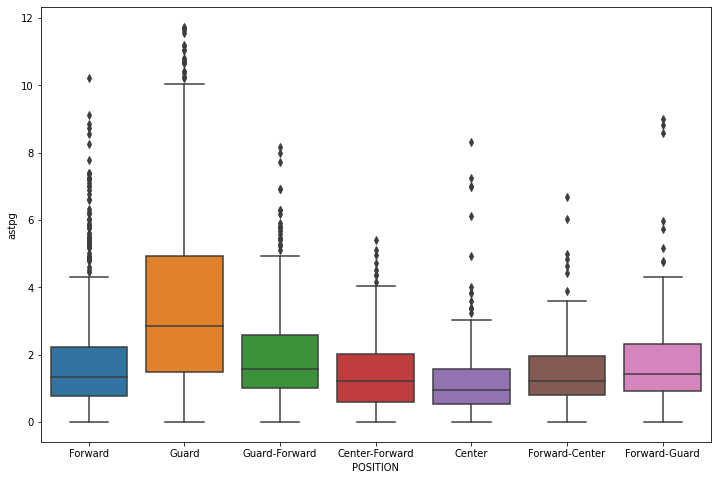

In [17]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = "POSITION", y = 'astpg', data = df_player_rating_stats)
plt.show()

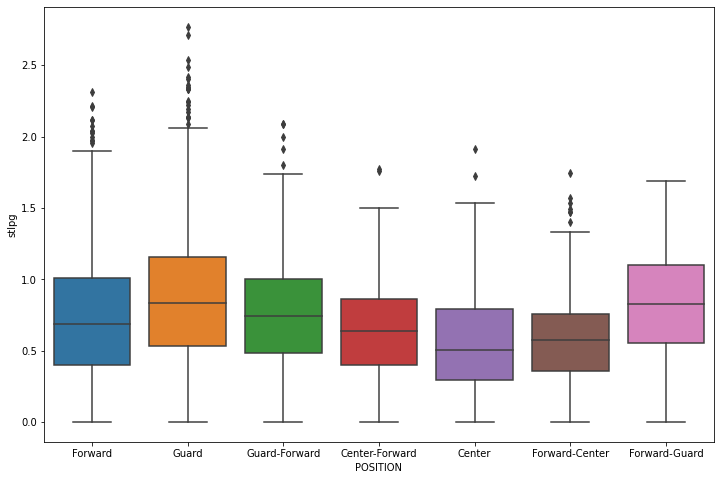

In [18]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = "POSITION", y = 'stlpg', data = df_player_rating_stats)
plt.show()

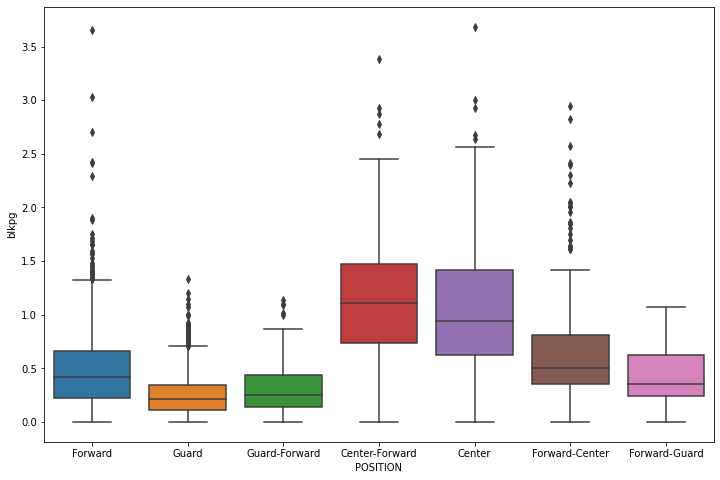

In [19]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = "POSITION", y = 'blkpg', data = df_player_rating_stats)
plt.show()

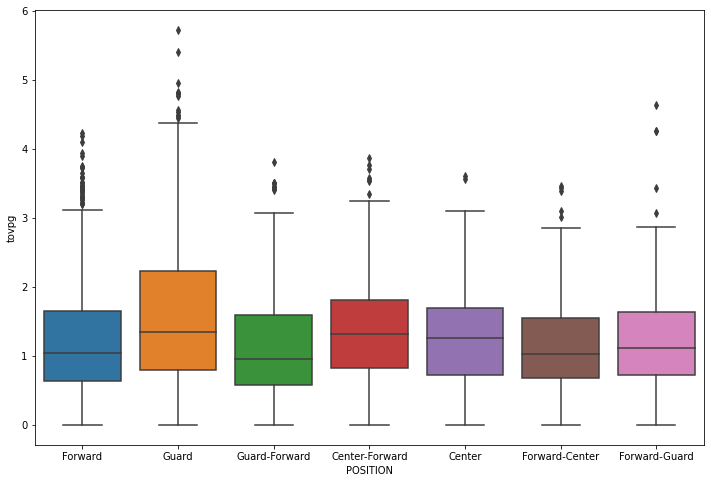

In [20]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = "POSITION", y = 'tovpg', data = df_player_rating_stats)
plt.show()

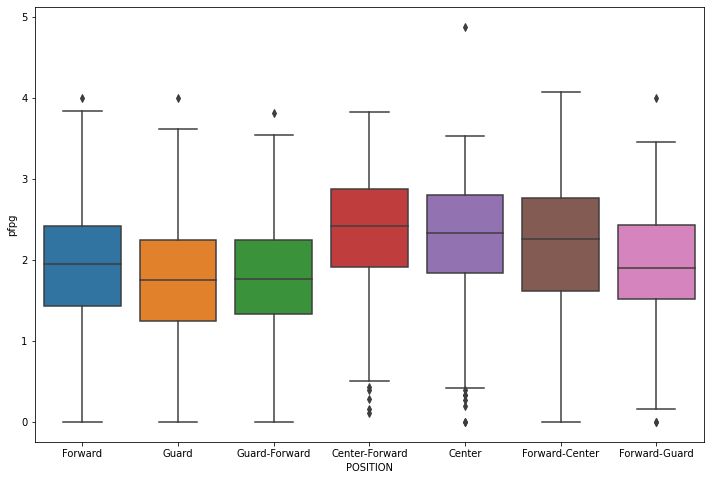

In [21]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = "POSITION", y = 'pfpg', data = df_player_rating_stats)
plt.show()

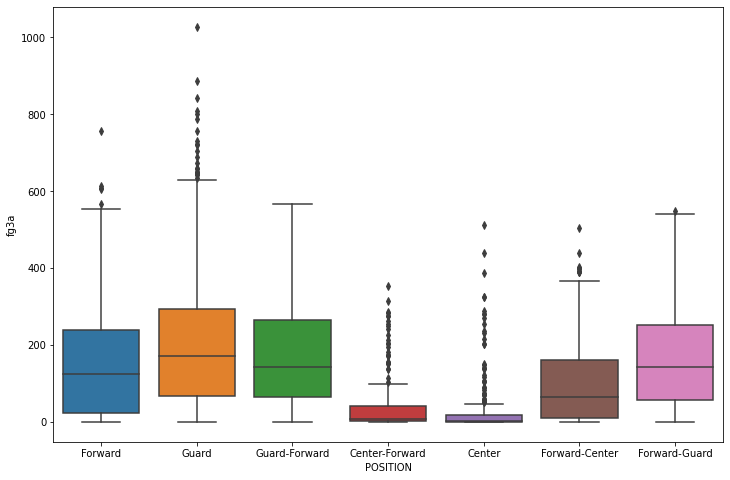

In [24]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = "POSITION", y = 'fg3a', data = df_player_rating_stats)
plt.show()

In [14]:
df_player_rating_stats.corr()

,player_age,player_id,league_id,team_id,gp,gs,min,fgm,fga,fg_pct,...,rating,ptspg,rebpg,orebpg,drebpg,astpg,stlpg,blkpg,tovpg,pfpg
player_age,1.000000,-0.409204,NaN,0.081203,0.049169,0.104780,0.102416,0.097970,0.092637,0.069553,...,0.337194,0.170702,0.142864,0.022428,0.183163,0.195184,0.131074,0.032042,0.099406,0.092285
player_id,-0.409204,1.000000,NaN,0.210307,-0.408118,-0.399516,-0.463669,-0.410902,-0.410246,-0.082965,...,-0.265009,-0.349105,-0.285314,-0.202522,-0.296817,-0.273830,-0.316165,-0.172105,-0.330528,-0.283769
league_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
team_id,0.081203,0.210307,NaN,1.000000,-0.024180,-0.078875,-0.067296,-0.072143,-0.064292,-0.030582,...,-0.033787,-0.083408,-0.065140,-0.054912,-0.063973,-0.071538,-0.059641,-0.053923,-0.063002,-0.048559
gp,0.049169,-0.408118,NaN,-0.024180,1.000000,0.640009,0.879972,0.732942,0.735846,0.192786,...,0.160426,0.440964,0.381600,0.279831,0.393065,0.300568,0.407625,0.234999,0.391388,0.459365
gs,0.104780,-0.399516,NaN,-0.078875,0.640009,1.000000,0.861926,0.823364,0.814502,0.176076,...,0.512177,0.700150,0.575176,0.385584,0.608289,0.506017,0.582699,0.348072,0.641658,0.566864
min,0.102416,-0.463669,NaN,-0.067296,0.879972,0.861926,1.000000,0.912569,0.917361,0.170102,...,0.449121,0.713540,0.533599,0.339280,0.572379,0.519140,0.613828,0.294932,0.639223,0.574917
fgm,0.097970,-0.410902,NaN,-0.072143,0.732942,0.823364,0.912569,1.000000,0.985208,0.209355,...,0.618386,0.868545,0.568705,0.355512,0.612699,0.564654,0.569860,0.312457,0.735620,0.528942
fga,0.092637,-0.410246,NaN,-0.064292,0.735846,0.814502,0.917361,0.985208,1.000000,0.111466,...,0.596906,0.865034,0.489302,0.254338,0.549692,0.596913,0.593303,0.227426,0.744458,0.501225
fg_pct,0.069553,-0.082965,NaN,-0.030582,0.192786,0.176076,0.170102,0.209355,0.111466,1.000000,...,0.147801,0.188122,0.425043,0.491459,0.358847,-0.020141,0.043899,0.421220,0.104821,0.312519


<AxesSubplot:>

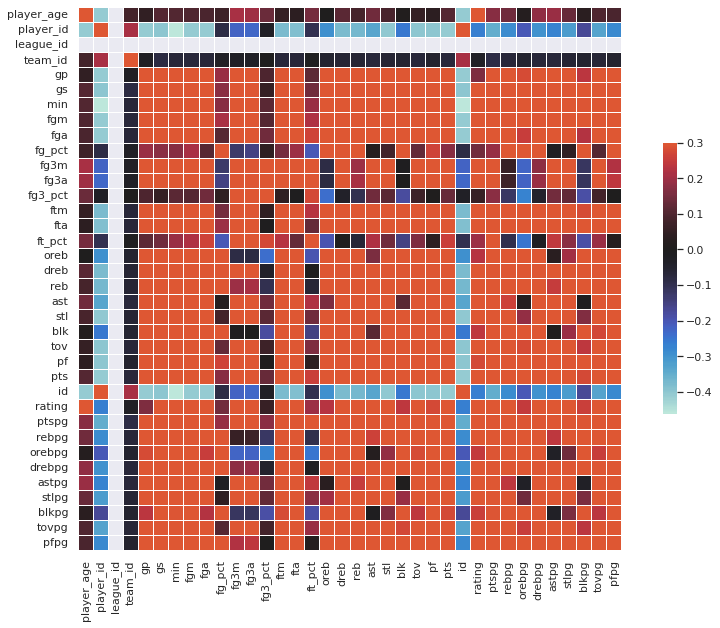

In [13]:

import seaborn as sns
sns.set_theme()



# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_player_rating_stats.corr(), vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
# sns.heatmap(df_player_rating_stats.select_dtypes("number"), annot=True, linewidths=.5, ax=ax)


In [32]:
df_player_rating_stats.columns

Index(['full_name', 'season_id', 'player_age', 'player_id', 'league_id',
       'team_id', 'gp', 'gs', 'min', 'fgm', 'fga', 'fg_pct', 'fg3m', 'fg3a',
       'fg3_pct', 'ftm', 'fta', 'ft_pct', 'oreb', 'dreb', 'reb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts', 'id', 'rating', 'ptspg', 'rebpg', 'orebpg',
       'drebpg', 'astpg', 'stlpg', 'blkpg', 'tovpg', 'pfpg'],
      dtype='object')

In [80]:
df_model = df_player_rating_stats.drop(['league_id', 'team_id', 'min', 'id'], axis = 1)

In [81]:
df_model = df_model.drop(['full_name', 'season_id', 'player_id', 'fg_pct', 'fg3_pct', 'ft_pct'], axis = 1)

In [42]:
from scipy import stats
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [91]:
def score(X, y, model = RandomForestRegressor()):
    
    score = cross_val_score(
        model, X, y, cv = 5, scoring = "neg_mean_absolute_error",
    )
    
    return - score.mean()

In [92]:
df_model_train = df_model.dropna(subset = ['rating'])
df_model_test = df_model[df_model['rating'].isnull()]

In [93]:
df_model_train.dtypes

player_age    float64
gp              int64
gs              int64
fgm             int64
fga             int64
fg3m            int64
fg3a            int64
ftm             int64
fta             int64
oreb            int64
dreb            int64
reb             int64
ast             int64
stl             int64
blk             int64
tov             int64
pf              int64
pts             int64
rating        float64
ptspg         float64
rebpg         float64
orebpg        float64
drebpg        float64
astpg         float64
stlpg         float64
blkpg         float64
tovpg         float64
pfpg          float64
dtype: object

In [94]:
X = df_model_train.copy()
y = X.pop('rating')

baseline_score = score(X, y)
print(f"Baseline score: {baseline_score:.5f} neg_root_mean_squared_error")

Baseline score: 2.75454 neg_root_mean_squared_error
